In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
data = pd.read_csv("C:/Users/user/Documents/PDS/assignment3/Raw data/Corona_NLP_test.csv")
# Preprocessing
data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"http\S+", "")
data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"@\S+", "")
data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"[^a-zA-Z0-9\s]", "") # Updated regex
data['OriginalTweet'] = data['OriginalTweet'].str.lower()
data = data[data['OriginalTweet'].notna() & data['OriginalTweet'] != ""]
print(data)

      UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     trending new yorkers encounter empty supermark...  Extremely Negative  
1     when i couldnt find hand sanitizer at fred mey...            Positive  
2     fin

C:\Users\user\AppData\Local\Temp\ipykernel_14920\474992549.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"http\S+", "")
C:\Users\user\AppData\Local\Temp\ipykernel_14920\474992549.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"@\S+", "")
C:\Users\user\AppData\Local\Temp\ipykernel_14920\474992549.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"[^a-zA-Z0-9\s]", "") # Updated regex


In [16]:
# Save cleaned data to a new CSV file
data.to_csv('C:/Users/user/Documents/PDS/assignment3/Clean data/Clean_data.csv', index=False)
     


In [17]:
#part 1:Convert the text corpus into tokens

# Tokenization
#a) Converting the text corpus into tokens.

data['tokens'] = data['OriginalTweet'].apply(word_tokenize)
print(data['tokens']) 

0       [trending, new, yorkers, encounter, empty, sup...
1       [when, i, couldnt, find, hand, sanitizer, at, ...
2       [find, out, how, you, can, protect, yourself, ...
3       [panic, buying, hits, newyork, city, as, anxio...
4       [toiletpaper, dunnypaper, coronavirus, coronav...
                              ...                        
3793    [meanwhile, in, a, supermarket, in, israel, pe...
3794    [did, you, panic, buy, a, lot, of, nonperishab...
3795    [asst, prof, of, economics, was, on, talking, ...
3796    [gov, need, to, do, somethings, instead, of, b...
3797    [i, and, members, are, committed, to, the, saf...
Name: tokens, Length: 3798, dtype: object


In [18]:
#part 2:Perform stop word removal.

stop_words = set(stopwords.words('english'))
data['tokens_no_stopwords'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print(data['tokens_no_stopwords'])

0       [trending, new, yorkers, encounter, empty, sup...
1       [couldnt, find, hand, sanitizer, fred, meyer, ...
2               [find, protect, loved, ones, coronavirus]
3       [panic, buying, hits, newyork, city, anxious, ...
4       [toiletpaper, dunnypaper, coronavirus, coronav...
                              ...                        
3793    [meanwhile, supermarket, israel, people, dance...
3794    [panic, buy, lot, nonperishable, items, echo, ...
3795    [asst, prof, economics, talking, recent, resea...
3796    [gov, need, somethings, instead, biar, je, rak...
3797    [members, committed, safety, employees, enduse...
Name: tokens_no_stopwords, Length: 3798, dtype: object


In [19]:
#part 3:Count Word frequencies

# Concatenate all the tweets into a single string
text = " ".join(data["OriginalTweet"].values)

# Split the string into words
words = text.split()

# Count the word frequencies using Counter
word_freq = Counter(words)

# Print the top 10 most frequent words
for word, freq in word_freq.most_common(10):
    print(word, freq)

the 4262
to 3739
covid19 2497
and 2449
of 2067
in 1834
a 1811
coronavirus 1512
for 1349
food 1332


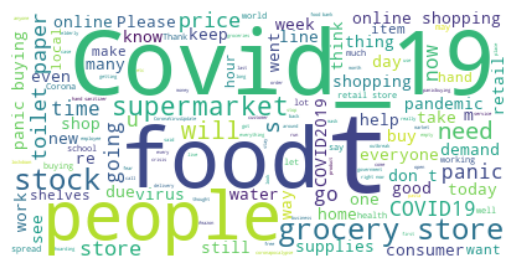

In [20]:
#part 4:Create word clouds.
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Load the dataset
data = pd.read_csv("C:/Users/user/Documents/PDS/assignment3/Raw data/Corona_NLP_test.csv")

# Concatenate all the tweets into a single string
text = " ".join(tweet for tweet in data['OriginalTweet'])

# Create a set of stopwords
stopwords = set(STOPWORDS)
stopwords.update(["co", "https", "amp", "coronavirus", "COVID", "19", "Covid", "covid"])

# Create a word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()